<a href="https://colab.research.google.com/github/MachokaGit/Machine-Learning/blob/main/barca_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your refined match stats
df = pd.read_csv('barca_match_stats_refined.csv')

# Filter head-to-head matches vs Real Madrid
h2h = df[df['Opponent'] == 'Real Madrid'].sort_values('Date')

# Display all stats for these fixtures
print("All Barcelona statistics vs Real Madrid:")
print(h2h.to_string(index=False))


All Barcelona statistics vs Real Madrid:
                     match_id       Date  Time         Competition Competition Round Day   Venue Result GF_for GA_for    Opponent  Gls_for  Sh_for  SoT_for  xG_for  Gls_against  Sh_against  SoT_against  xG_against  corner_kicks_for  corner_kicks_against  offsides_for  yellow_cards_for  red_cards_for  offsides_against  yellow_cards_against  red_cards_against
20211024_Barcelona_REALMADRID 2021-10-24 16:15             La Liga      Matchweek 10 Sun    Home      L    1.0    2.0 Real Madrid        1      12        2     1.6            2          10            5         1.5               7.0                   4.0             2                 1              0                 5                     1                  0
20220112_Barcelona_REALMADRID 2022-01-12 22:00 Supercopa de España       Semi-finals Wed    Home      L    2.0    3.0 Real Madrid        2      20        6     NaN            3          14            8         NaN               NaN        

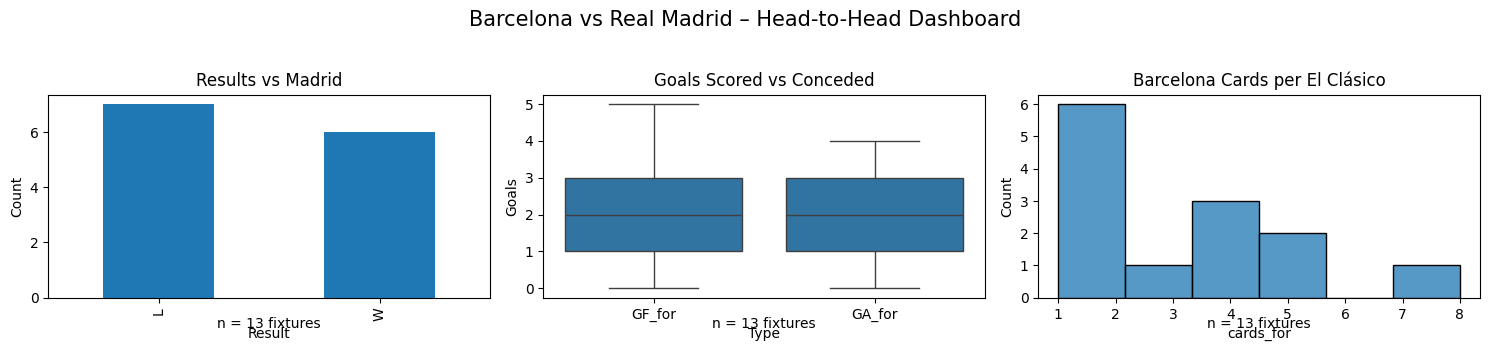

Last 5 El Clásico Results (Barcelona perspective):
      Date Result  GF_for  GA_for         Competition   Venue
2023-10-28      L       1       2             La Liga    Home
2024-01-14      L       1       4 Supercopa de España    Away
2024-04-21      L       2       3             La Liga    Away
2024-10-26      W       4       0             La Liga    Away
2025-01-12      W       5       2 Supercopa de España Neutral


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# 1) LOAD DATA  & PARSE DATE
# ---------------------------------------------------
df = pd.read_csv('barca_match_stats_refined.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ---------------------------------------------------
# 2) FILTER HEAD-TO-HEAD (El Clásico only)
# ---------------------------------------------------
h2h = df[df['Opponent'] == 'Real Madrid'].sort_values('Date')

# ---------------------------------------------------
# 3) PLOT HEAD-TO-HEAD METRICS
# ---------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Barcelona vs Real Madrid – Head-to-Head Dashboard", fontsize=15)

# (A) Result distribution
h2h['Result'].value_counts().plot(kind='bar', ax=axes[0], title='Results vs Madrid')
axes[0].set_xlabel('Result')
axes[0].set_ylabel('Count')
axes[0].text(0.5, -0.15, f'n = {len(h2h)} fixtures', ha='center', transform=axes[0].transAxes)

# (B) Goals scored vs conceded
sns.boxplot(
    data=h2h[['GF_for', 'GA_for']].melt(var_name='Type', value_name='Goals'),
    x='Type', y='Goals', ax=axes[1]
)
axes[1].set_title('Goals Scored vs Conceded')
axes[1].text(0.5, -0.15, f'n = {len(h2h)} fixtures', ha='center', transform=axes[1].transAxes)

# (C) Cards distribution
h2h['cards_for'] = h2h['yellow_cards_for'] + h2h['red_cards_for']
sns.histplot(h2h['cards_for'], bins=6, ax=axes[2])
axes[2].set_title('Barcelona Cards per El Clásico')
axes[2].text(0.5, -0.15, f'n = {len(h2h)} fixtures', ha='center', transform=axes[2].transAxes)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# ---------------------------------------------------
# 4) SHOW LAST 5 H2H RESULTS
# ---------------------------------------------------
print("Last 5 El Clásico Results (Barcelona perspective):")
display_cols = ['Date', 'Result', 'GF_for', 'GA_for', 'Competition', 'Venue']
print(h2h[display_cols].tail(5).to_string(index=False))


In [ ]:
import pandas as pd
import numpy as np

# Load file
df = pd.read_csv("barca_match_stats_refined.csv")

# Columns that should be numeric
numeric_columns = [
    'GF_for', 'GA_for',
    'xG_for', 'xG_against',
    'corner_kicks_for', 'corner_kicks_against',
    'yellow_cards_for', 'yellow_cards_against',
    'red_cards_for', 'red_cards_against'
]

# Identify rows where any of those columns cannot be converted to float cleanly
mask_error_rows = np.zeros(len(df), dtype=bool)

for col in numeric_columns:
    # True where conversion fails OR becomes NaN unexpectedly
    bad = pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()
    mask_error_rows = mask_error_rows | bad

# Show only those rows
erroneous_rows = df[mask_error_rows]

print(f"Found {len(erroneous_rows)} rows with problematic values in numeric columns:")
print(erroneous_rows)


Found 0 rows with problematic values in numeric columns:
Empty DataFrame
Columns: [match_id, Date, Time, Competition, Competition Round, Day, Venue, Result, GF_for, GA_for, Opponent, Gls_for, Sh_for, SoT_for, xG_for, Gls_against, Sh_against, SoT_against, xG_against, corner_kicks_for, corner_kicks_against, offsides_for, yellow_cards_for, red_cards_for, offsides_against, yellow_cards_against, red_cards_against]
Index: []

[0 rows x 27 columns]


In [ ]:
import pandas as pd
import numpy as np

# -------------------------------------------------
# 1) LOAD & CLEAN NUMERIC COLUMNS
# -------------------------------------------------
df = pd.read_csv("barca_match_stats_refined.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Columns expected to be numeric
numeric_columns = [
    'GF_for', 'GA_for',
    'xG_for', 'xG_against',
    'corner_kicks_for', 'corner_kicks_against',
    'yellow_cards_for', 'yellow_cards_against',
    'red_cards_for', 'red_cards_against'
]

# Strip non-numeric characters like '2 (4)', '*' etc., convert to float
for col in numeric_columns:
    df[col] = (
        df[col].astype(str)
                .str.replace(r'[^0-9\.]', '', regex=True)
                .replace('', np.nan)
                .astype(float)
    )

# -------------------------------------------------
# 2) FILTER LAST 5 H2H vs REAL MADRID
# -------------------------------------------------
h2h = df[df['Opponent'] == 'Real Madrid'].sort_values('Date')
last5 = h2h.tail(5).copy()

# -------------------------------------------------
# 3) BUILD LAST-5 TABLE
# -------------------------------------------------
last5['Score'] = last5['GF_for'].fillna(0).astype(int).astype(str) + "-" + last5['GA_for'].fillna(0).astype(int).astype(str)
last5['xG'] = last5['xG_for'].round(2).astype(str) + " – " + last5['xG_against'].round(2).astype(str)

# Corners & cards with fillna to avoid IntCastingNaNError
last5['Corners'] = (
    last5['corner_kicks_for'].fillna(0).astype(int).astype(str) +
    " – " +
    last5['corner_kicks_against'].fillna(0).astype(int).astype(str)
)

last5['Cards'] = (
    (last5['yellow_cards_for'] + last5['red_cards_for']).fillna(0).astype(int).astype(str) +
    " – " +
    (last5['yellow_cards_against'] + last5['red_cards_against']).fillna(0).astype(int).astype(str)
)

cols = ['Date','Venue','Competition','Result','Score','xG','Corners','Cards']
last5_table = last5[cols]

# -------------------------------------------------
# 4) VENUE-SPLIT SUMMARY
# -------------------------------------------------
last5['cards_for'] = (last5['yellow_cards_for'] + last5['red_cards_for'])

# summarise by venue
summary = (
    last5.groupby('Venue')
    .agg(
        Matches=('Venue','count'),
        Avg_Goals=('GF_for','mean'),
        Avg_Corners=('corner_kicks_for','mean'),
        Avg_Cards=('cards_for','mean')
    )
    .round(2)
    .reset_index()
    .rename(columns={
        'Venue':'Venue_Type',
        'Avg_Goals':'Avg Goals Scored',
        'Avg_Corners':'Avg Corners Won',
        'Avg_Cards':'Avg Cards'
    })
)

# -------------------------------------------------
# 5) DISPLAY BOTH TABLES
# -------------------------------------------------
print("\nLast 5 El Clásico matches (Barcelona perspective):")
print(last5_table.to_string(index=False))

print("\nVenue-split Barcelona averages (based on last 5):")
print(summary.to_string(index=False))



Last 5 El Clásico matches (Barcelona perspective):
      Date   Venue         Competition Result Score        xG Corners Cards
2023-10-28    Home             La Liga      L   1-2 1.5 – 1.1   6 – 3 2 – 1
2024-01-14    Away Supercopa de España      L   1-4 nan – nan   0 – 0 4 – 2
2024-04-21    Away             La Liga      L   2-3 1.4 – 2.3   8 – 2 2 – 3
2024-10-26    Away             La Liga      W   4-0 2.6 – 1.5  3 – 10 5 – 2
2025-01-12 Neutral Supercopa de España      W   5-2 nan – nan   0 – 0 5 – 5

Venue-split Barcelona averages (based on last 5):
Venue_Type  Matches  Avg Goals Scored  Avg Corners Won  Avg Cards
      Away        3              2.33              5.5       3.67
      Home        1              1.00              6.0       2.00
   Neutral        1              5.00              NaN       5.00


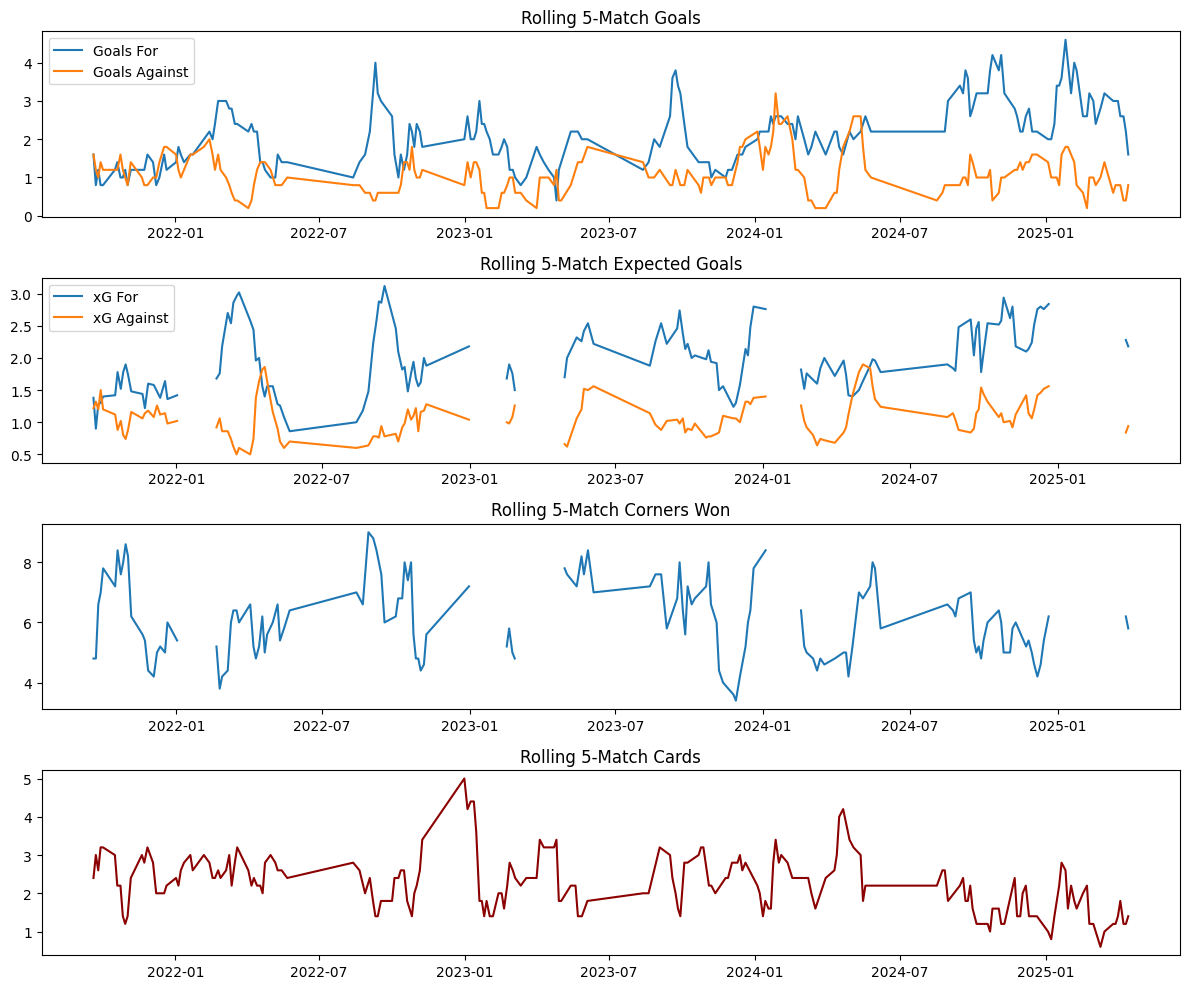

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1) LOAD DATA
# -------------------------------------------------
df = pd.read_csv('barca_match_stats_refined.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# -------------------------------------------------
# 2) PREP METRICS & ROLLING CALCULATIONS
# -------------------------------------------------
df = df.sort_values('Date')

# Create cards_for field
df['cards_for'] = df['yellow_cards_for'] + df['red_cards_for']

# Force into numeric properly if not already
cols_to_numeric = ['GF_for','GA_for','xG_for','xG_against',
                   'corner_kicks_for','cards_for']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Rolling window
W = 5

df['roll_goals_for']      = df['GF_for'].rolling(W).mean()
df['roll_goals_against']  = df['GA_for'].rolling(W).mean()
df['roll_xg_for']         = df['xG_for'].rolling(W).mean()
df['roll_xg_against']     = df['xG_against'].rolling(W).mean()
df['roll_corners_for']    = df['corner_kicks_for'].rolling(W).mean()
df['roll_cards']          = df['cards_for'].rolling(W).mean()

# -------------------------------------------------
# 3) PLOT
# -------------------------------------------------
plt.figure(figsize=(12,10))

# (A) Goals
plt.subplot(4,1,1)
plt.plot(df['Date'], df['roll_goals_for'], label='Goals For')
plt.plot(df['Date'], df['roll_goals_against'], label='Goals Against')
plt.title(f'Rolling {W}-Match Goals')
plt.legend()

# (B) xG
plt.subplot(4,1,2)
plt.plot(df['Date'], df['roll_xg_for'], label='xG For')
plt.plot(df['Date'], df['roll_xg_against'], label='xG Against')
plt.title(f'Rolling {W}-Match Expected Goals')
plt.legend()

# (C) Corners
plt.subplot(4,1,3)
plt.plot(df['Date'], df['roll_corners_for'])
plt.title(f'Rolling {W}-Match Corners Won')

# (D) Cards
plt.subplot(4,1,4)
plt.plot(df['Date'], df['roll_cards'], color='darkred')
plt.title(f'Rolling {W}-Match Cards')

plt.tight_layout()
plt.show()


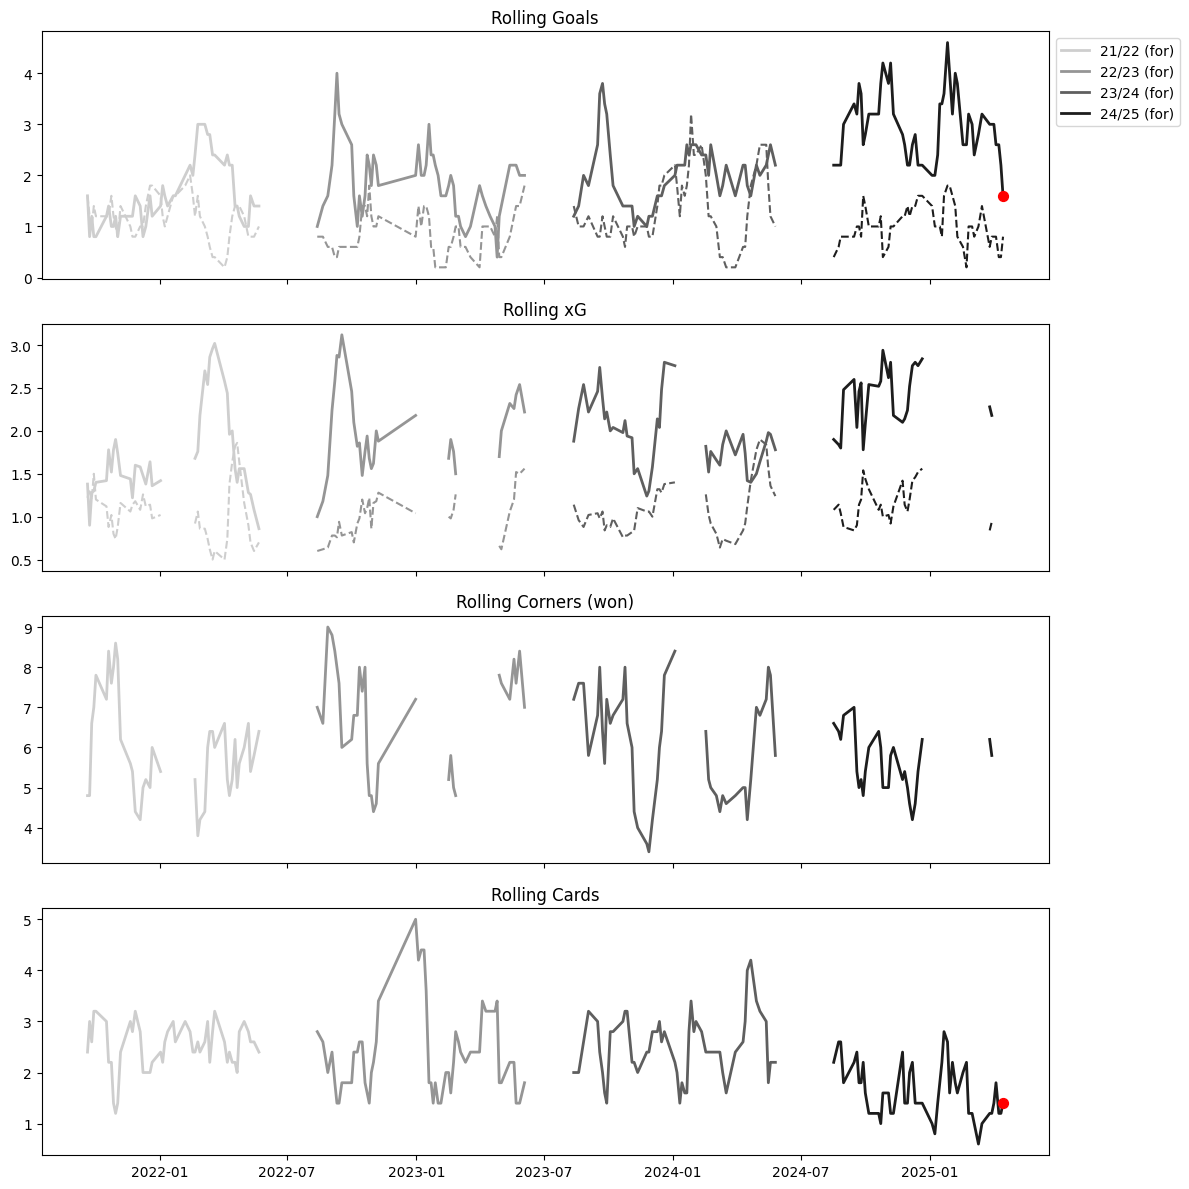

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# ---------------------------------------------------
# 1) LOAD AND DERIVE SEASON FROM DATE
# ---------------------------------------------------
df = pd.read_csv('barca_match_stats_refined.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Derive season based on July-June cut
def get_short_season(date):
    year = date.year
    if date.month >= 7:
        return f"{str(year)[-2:]}/{str(year + 1)[-2:]}"
    else:
        return f"{str(year - 1)[-2:]}/{str(year)[-2:]}"
df['Season'] = df['Date'].apply(get_short_season)

# ---------------------------------------------------
# 2) PREP METRICS AND ROLLING WINDOW
# ---------------------------------------------------
df = df.sort_values('Date')
df['cards_for'] = df['yellow_cards_for'] + df['red_cards_for']
numeric_cols = ['GF_for','GA_for','xG_for','xG_against','corner_kicks_for','cards_for']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

W = 5
df['roll_goals_for']     = df['GF_for'].rolling(W).mean()
df['roll_goals_against'] = df['GA_for'].rolling(W).mean()
df['roll_xg_for']        = df['xG_for'].rolling(W).mean()
df['roll_xg_against']    = df['xG_against'].rolling(W).mean()
df['roll_corners_for']   = df['corner_kicks_for'].rolling(W).mean()
df['roll_cards']         = df['cards_for'].rolling(W).mean()

# ---------------------------------------------------
# 3) PLOT WITH SEASON OVERLAYS
# ---------------------------------------------------
metrics = [
    ('roll_goals_for',      'roll_goals_against',  'Rolling Goals'),
    ('roll_xg_for',         'roll_xg_against',     'Rolling xG'),
    ('roll_corners_for',    None,                  'Rolling Corners (won)'),
    ('roll_cards',          None,                  'Rolling Cards')
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 12), sharex=True)

# seasons sorted oldest→newest
all_seasons = sorted(df['Season'].unique())
colors = cm.Greys(np.linspace(0.3, 0.9, len(all_seasons)))  # darker for newer

for idx, (metric_for, metric_against, title) in enumerate(metrics):
    ax = axes[idx]
    for i, season in enumerate(all_seasons):
        sub = df[df['Season'] == season]
        ax.plot(sub['Date'], sub[metric_for], label=f'{season} (for)', color=colors[i], linewidth=2)
        if metric_against:
            ax.plot(sub['Date'], sub[metric_against], linestyle='--', color=colors[i], linewidth=1.5)

    # red dot for most recent point (current form)
    latest = df.iloc[-1]
    ax.scatter(latest['Date'], latest[metric_for], color='red', s=50, zorder=5)

    ax.set_title(title)
    if idx == 0:
        ax.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


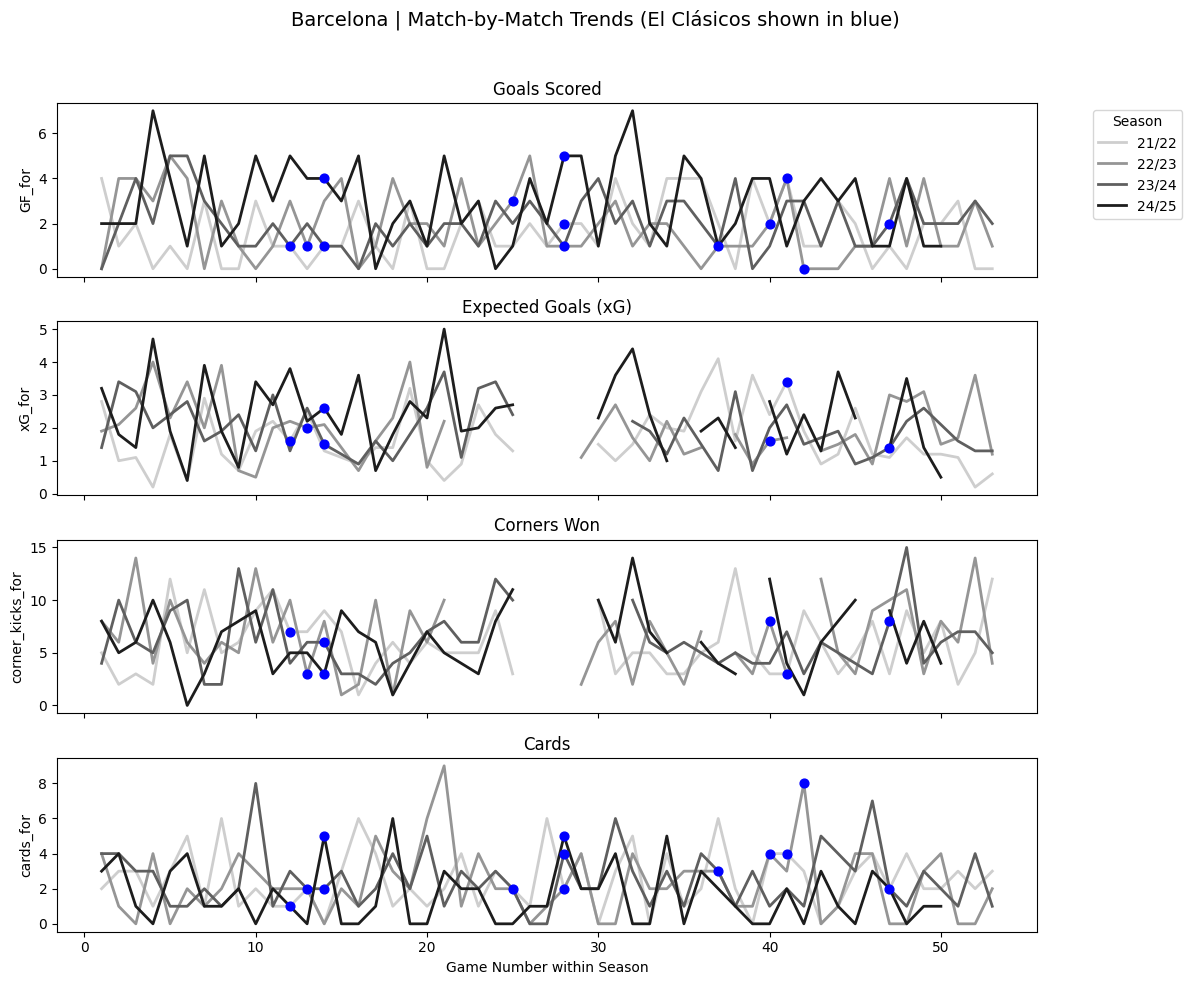

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# -------------------------------------------------------
# 1. Load data & create Aug–May 'Season' and in-season game number
# -------------------------------------------------------
df = pd.read_csv('barca_match_stats_refined.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

def get_season_aug_may(date):
    y = date.year
    if date.month >= 8:
        return f"{str(y)[-2:]}/{str(y+1)[-2:]}"
    else:
        return f"{str(y-1)[-2:]}/{str(y)[-2:]}"

df['Season'] = df['Date'].apply(get_season_aug_may)
df = df.sort_values(['Season','Date'])
df['GameNo'] = df.groupby('Season').cumcount() + 1

# Metrics setup
df['cards_for'] = df['yellow_cards_for'] + df['red_cards_for']
metrics = {
    'GF_for'         : 'Goals Scored',
    'xG_for'         : 'Expected Goals (xG)',
    'corner_kicks_for': 'Corners Won',
    'cards_for'      : 'Cards'
}

# -------------------------------------------------------
# 2. Dashboard Plot
# -------------------------------------------------------
seasons_sorted = sorted(df['Season'].unique())
colors = cm.Greys(np.linspace(0.3, 0.9, len(seasons_sorted)))

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 10), sharex=True)

for i, (metric_col, title) in enumerate(metrics.items()):
    ax = axes[i]
    for j,season in enumerate(seasons_sorted):
        sub = df[df['Season'] == season]
        ax.plot(sub['GameNo'], sub[metric_col], label=season, color=colors[j], linewidth=2)

        # Highlight El Clásicos vs Real Madrid
        mask = sub['Opponent'].eq('Real Madrid')
        ax.scatter(sub.loc[mask,'GameNo'], sub.loc[mask,metric_col],
                   color='blue', s=40, zorder=5)

    ax.set_title(title)
    ax.set_ylabel(metric_col)

axes[-1].set_xlabel("Game Number within Season")
# Legend only once
axes[0].legend(title='Season', bbox_to_anchor=(1.05,1), loc='upper left')

plt.suptitle("Barcelona | Match-by-Match Trends (El Clásicos shown in blue)", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


Season
21/22    53
22/23    53
23/24    53
24/25    50
Name: count, dtype: int64


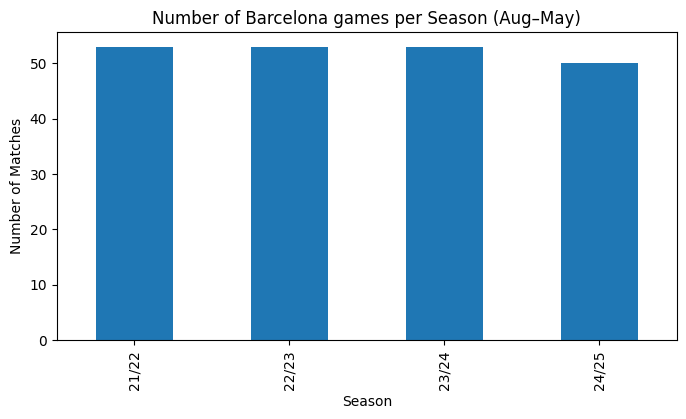

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1) Load data & derive season (August–May season logic)
# -------------------------------------------------------
df = pd.read_csv('barca_match_stats_refined.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

def get_season_aug_may(date):
    year = date.year
    # If it's June or later, the match belongs to that starting year
    if date.month >= 8:  # August = start of a new season
        return f"{str(year)[-2:]}/{str(year+1)[-2:]}"
    else:
        return f"{str(year-1)[-2:]}/{str(year)[-2:]}"

df['Season'] = df['Date'].apply(get_season_aug_may)

# -------------------------------------------------------
# 2) Count matches per season
# -------------------------------------------------------
counts = df['Season'].value_counts().sort_index()

print(counts)

# -------------------------------------------------------
# 3) Plot bar chart
# -------------------------------------------------------
plt.figure(figsize=(8,4))
counts.plot(kind='bar')
plt.title('Number of Barcelona games per Season (Aug–May)')
plt.ylabel('Number of Matches')
plt.xlabel('Season')
plt.show()


In [22]:
import pandas as pd

def get_season_aug_may(date):
    """Return football season label (e.g. 23/24) given a datetime."""
    if pd.isna(date):
        return None
    y = date.year
    if date.month >= 8:  # Aug–Dec = start of season
        return f"{str(y)[-2:]}/{str(y+1)[-2:]}"
    else:  # Jan–May = continuation of season
        return f"{str(y-1)[-2:]}/{str(y)[-2:]}"

def add_season_column(filepath):
    df = pd.read_csv(filepath)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Season'] = df['Date'].apply(get_season_aug_may)
    return df


In [23]:
df = add_season_column("barca_match_stats_refined.csv")
print(df.columns)



Index(['match_id', 'Date', 'Time', 'Competition', 'Competition Round', 'Day',
       'Venue', 'Result', 'GF_for', 'GA_for', 'Opponent', 'Gls_for', 'Sh_for',
       'SoT_for', 'xG_for', 'Gls_against', 'Sh_against', 'SoT_against',
       'xG_against', 'corner_kicks_for', 'corner_kicks_against',
       'offsides_for', 'yellow_cards_for', 'red_cards_for', 'offsides_against',
       'yellow_cards_against', 'red_cards_against', 'Season'],
      dtype='object')


In [37]:
df.

<bound method NDFrame.describe of                               match_id       Date   Time   Competition  \
0      20210815_Barcelona_REALSOCIEDAD 2021-08-15  20:00       La Liga   
1      20210821_Barcelona_ATHLETICCLUB 2021-08-21  22:00       La Liga   
2            20210829_Barcelona_GETAFE 2021-08-29  17:00       La Liga   
3    20210914_Barcelona_DEBAYERNMUNICH 2021-09-14  21:00  Champions Lg   
4           20210920_Barcelona_GRANADA 2021-09-20  21:00       La Liga   
..                                 ...        ...    ...           ...   
204  20250402_Barcelona_ATLÉTICOMADRID 2025-04-02  21:30  Copa del Rey   
205           20250405_Barcelona_BETIS 2025-04-05  21:00       La Liga   
206      20250409_Barcelona_DEDORTMUND 2025-04-09  21:00  Champions Lg   
207         20250412_Barcelona_LEGANÉS 2025-04-12  21:00       La Liga   
208      20250415_Barcelona_DEDORTMUND 2025-04-15  21:00  Champions Lg   

    Competition Round  Day Venue Result  GF_for  GA_for  ... xG_against  \
0         Matchweek 1  Sun  Home      W       4       2  ...        0.8   
1         Matchweek 2  Sat  Away      D       1       1  ...        1.4   
2         Matchweek 3  Sun  Home      W       2       1  ...        0.4   
3         Group stage  Tue  Home      L       0       3  ...        2.7   
4         Matchweek 5  Mon  Home      D       1       1  ...        0.8   
..                ...  ...   ...    ...     ...     ...  ...        ...   
204       Semi-finals  Wed  Away      W       1       0  ...        NaN   
205      Matchweek 30  Sat  Home      D       1       1  ...        0.3   
206    Quarter-finals  Wed  Home      W       4       0  ...        1.4   
207      Matchweek 31  Sat  Away      W       1       0  ...        0.7   
208    Quarter-finals  Tue  Away      L       1       3  ...        3.6   

     corner_kicks_for  corner_kicks_against  offsides_for  yellow_cards_for  \
0                 5.0                   3.0             1                 2   
1                 2.0                  13.0             2                 2   
2                 3.0                   2.0             3                 3   
3                 2.0                   1.0             2                 1   
4                12.0                   4.0             1                 3   
..                ...                   ...           ...               ...   
204               NaN                   NaN             1                 3   
205               9.0                   3.0             2                 2   
206               4.0                   6.0             1                 0   
207               8.0                   4.0             3                 1   
208               4.0                   8.0             2                 1   

     red_cards_for  offsides_against  yellow_cards_against  red_cards_against  \
0                0                 2                     4                  0   
1                1                 3                     1                  0   
2                0                 1                     1                  0   
3                0                 2                     2                  0   
4                0                 0                     6                  0   
..             ...               ...                   ...                ...   
204              0                 4                     5                  0   
205              0                 3                     1                  0   
206              0                 4                     2                  0   
207              0                 4                     2                  0   
208              0                 4                     1                  0   

     Season  
0     21/22  
1     21/22  
2     21/22  
3     21/22  
4     21/22  
..      ...  
204   24/25  
205   24/25  
206   24/25  
207   24/25  
208   24/25  

[209 rows x 28 columns]>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def general_stats_view(df, plot=True):
    """
    Produce a general stats view for a team-level match dataframe that already includes `Season`.
    Expects columns: Date, Season, Venue, Result, GF_for, GA_for, xG_for, xG_against,
                     corner_kicks_for, corner_kicks_against, yellow_cards_for, red_cards_for.

    Returns a dict of DataFrames/Series with key summaries.
    Set plot=False to skip charts.
    """
    df = df.copy()

    # --- Ensure types ---
    numeric_cols = [
        'GF_for','GA_for','xG_for','xG_against',
        'corner_kicks_for','corner_kicks_against',
        'yellow_cards_for','red_cards_for'
    ]
    for c in numeric_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')

    # --- Derived flags/metrics ---
    df['TotalGoals'] = df['GF_for'] + df['GA_for']
    df['Over25']     = df['TotalGoals'] > 2.5
    df['BTTS']       = (df['GF_for'] >= 1) & (df['GA_for'] >= 1)

    # --- Season-level summary (means) ---
    season_summary = df.groupby('Season').agg({
        'GF_for':'mean', 'GA_for':'mean',
        'xG_for':'mean', 'xG_against':'mean',
        'corner_kicks_for':'mean', 'corner_kicks_against':'mean',
        'yellow_cards_for':'mean', 'red_cards_for':'mean'
    }).rename(columns={
        'GF_for':'GF_avg', 'GA_for':'GA_avg',
        'xG_for':'xGF_avg', 'xG_against':'xGA_avg',
        'corner_kicks_for':'Corners_for_avg',
        'corner_kicks_against':'Corners_against_avg',
        'yellow_cards_for':'Yellows_avg',
        'red_cards_for':'Reds_avg'
    }).sort_index()

    # --- O/U 2.5 and BTTS rates per season ---
    ou25_by_season     = (df.groupby('Season')['Over25'].mean() * 100).rename('%Over2.5')
    btts_by_season     = (df.groupby('Season')['BTTS'].mean() * 100).rename('%BTTS')
    yellows_by_season  = season_summary['Yellows_avg'] if 'Yellows_avg' in season_summary else pd.Series(dtype=float)

    # --- Home vs Away results table ---
    if 'Venue' in df.columns and 'Result' in df.columns:
        home_away_results = df.groupby(['Venue','Result']).size().unstack(fill_value=0)
    else:
        home_away_results = pd.DataFrame()

    # --- Venue goals (GF/GA by venue) ---
    if 'Venue' in df.columns:
        venue_goals = df.groupby('Venue')[['GF_for','GA_for']].mean().rename(
            columns={'GF_for':'GF_avg','GA_for':'GA_avg'}
        )
    else:
        venue_goals = pd.DataFrame()

    # --- Overall summary (all matches) ---
    overall = pd.Series({
        'GF_avg'              : df['GF_for'].mean(),
        'GA_avg'              : df['GA_for'].mean(),
        'xGF_avg'             : df['xG_for'].mean(),
        'xGA_avg'             : df['xG_against'].mean(),
        'Corners_for_avg'     : df['corner_kicks_for'].mean(),
        'Corners_against_avg' : df['corner_kicks_against'].mean(),
        'Yellows_avg'         : df['yellow_cards_for'].mean(),
        'Reds_avg'            : df['red_cards_for'].mean(),
        '%Over2.5'            : df['Over25'].mean() * 100,
        '%BTTS'               : df['BTTS'].mean() * 100,
        'Matches'             : len(df)
    }).round(2)

    # --- Quick plots (optional) ---
    if plot:
        # 1) Goals per season
        if not season_summary.empty:
            season_summary[['GF_avg','GA_avg']].plot(kind='bar', figsize=(10,5))
            plt.title("Avg Goals Scored vs Conceded per Season")
            plt.ylabel("Goals per Match")
            plt.tight_layout()
            plt.show()

        # 2) Over 2.5 & BTTS per season
        if not ou25_by_season.empty or not btts_by_season.empty:
            pd.concat([ou25_by_season, btts_by_season], axis=1).plot(kind='bar', figsize=(10,5))
            plt.title("% Over 2.5 and % BTTS per Season")
            plt.ylabel("Percent (%)")
            plt.tight_layout()
            plt.show()

        # 3) Corners per season
        if not season_summary.empty:
            season_summary[['Corners_for_avg','Corners_against_avg']].plot(kind='bar', figsize=(10,5))
            plt.title("Avg Corners For vs Against per Season")
            plt.ylabel("Corners per Match")
            plt.tight_layout()
            plt.show()

        # 4) Cards per season
        if not season_summary.empty:
            season_summary[['Yellows_avg','Reds_avg']].plot(kind='bar', figsize=(10,5))
            plt.title("Discipline per Season (Yellows & Reds)")
            plt.ylabel("Cards per Match")
            plt.tight_layout()
            plt.show()

        # 5) Home vs Away results
        if not home_away_results.empty:
            home_away_results.plot(kind='bar', stacked=True, figsize=(9,5))
            plt.title("Home vs Away Results")
            plt.ylabel("Matches")
            plt.tight_layout()
            plt.show()

    # --- Return all artifacts ---
    return {
        "df": df,
        "season_summary": season_summary.round(2),
        "ou25_by_season": ou25_by_season.round(1),
        "btts_by_season": btts_by_season.round(1),
        "yellows_by_season": yellows_by_season.round(2),
        "home_away_results": home_away_results,
        "venue_goals": venue_goals.round(2),
        "overall": overall
    }


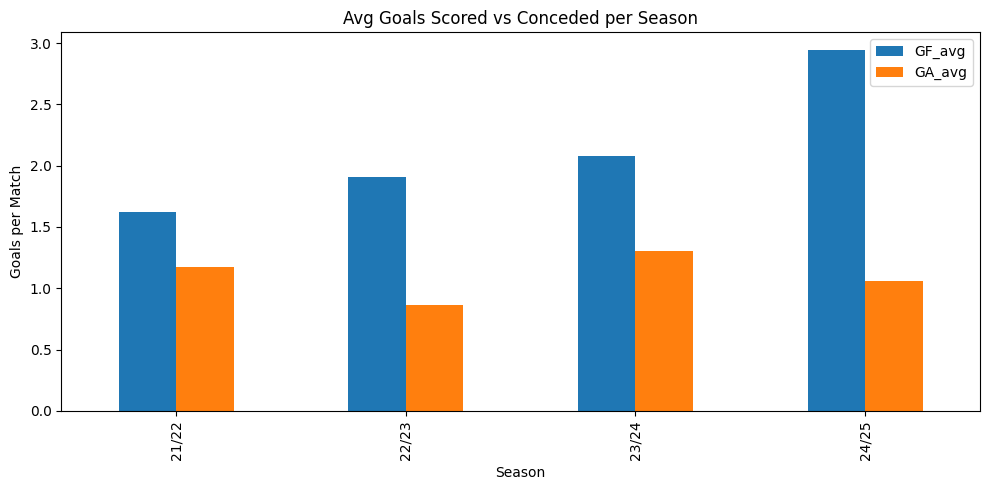

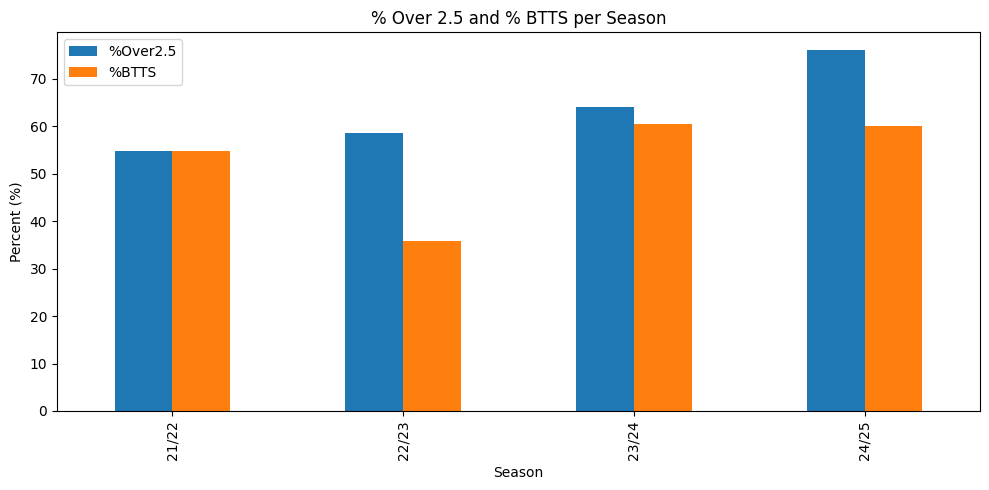

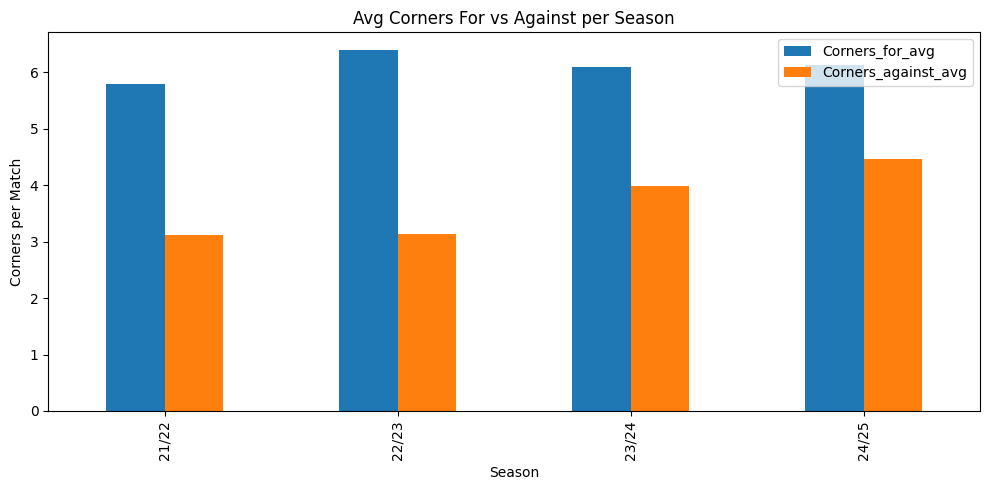

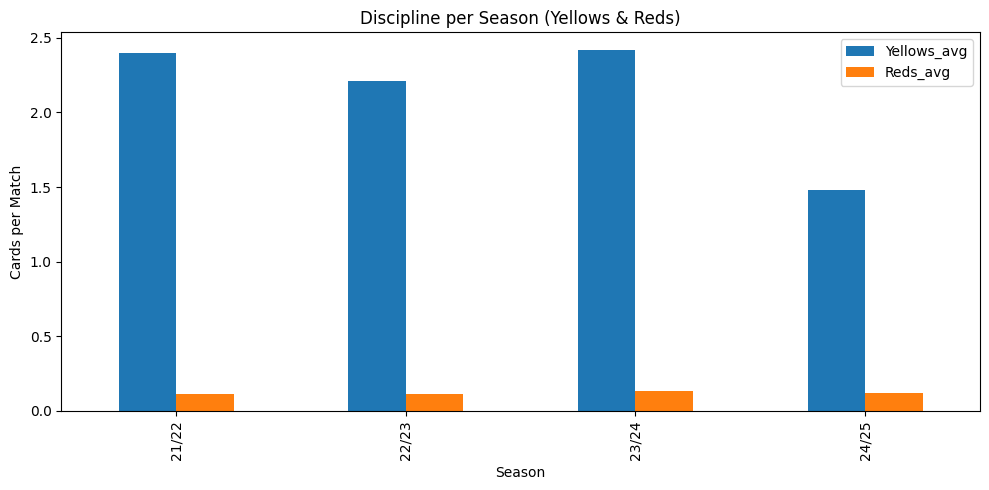

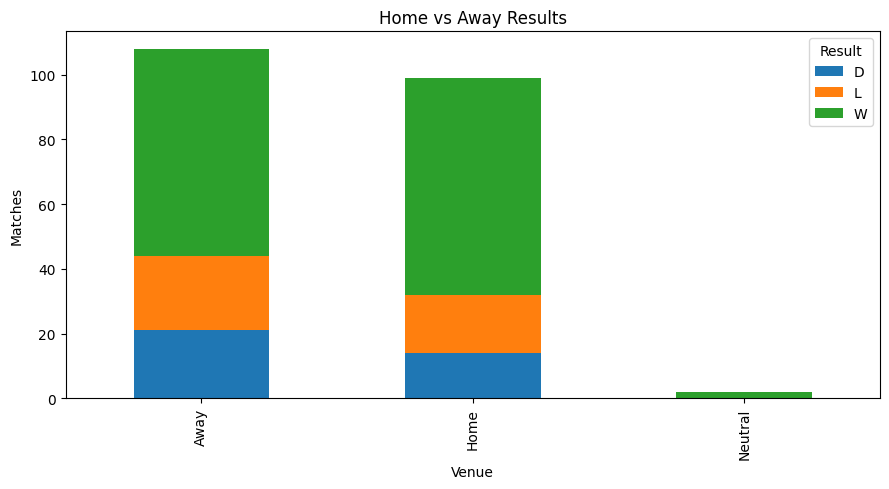

GF_avg                   2.12
GA_avg                   1.10
xGF_avg                  1.96
xGA_avg                  1.06
Corners_for_avg          6.10
Corners_against_avg      3.65
Yellows_avg              2.13
Reds_avg                 0.12
%Over2.5                63.16
%BTTS                   52.63
Matches                209.00
dtype: float64
Season
21/22    2.40
22/23    2.21
23/24    2.42
24/25    1.48
Name: Yellows_avg, dtype: float64
Season
21/22    54.7
22/23    58.5
23/24    64.2
24/25    76.0
Name: %Over2.5, dtype: float64
Season
21/22    54.7
22/23    35.8
23/24    60.4
24/25    60.0
Name: %BTTS, dtype: float64


In [40]:
stats = general_stats_view(df, plot=True)

# Overall averages (includes yellows now)
print(stats['overall'])

# Seasonal yellow card averages
print(stats['yellows_by_season'])

# Access like others
print(stats['ou25_by_season'])
print(stats['btts_by_season'])




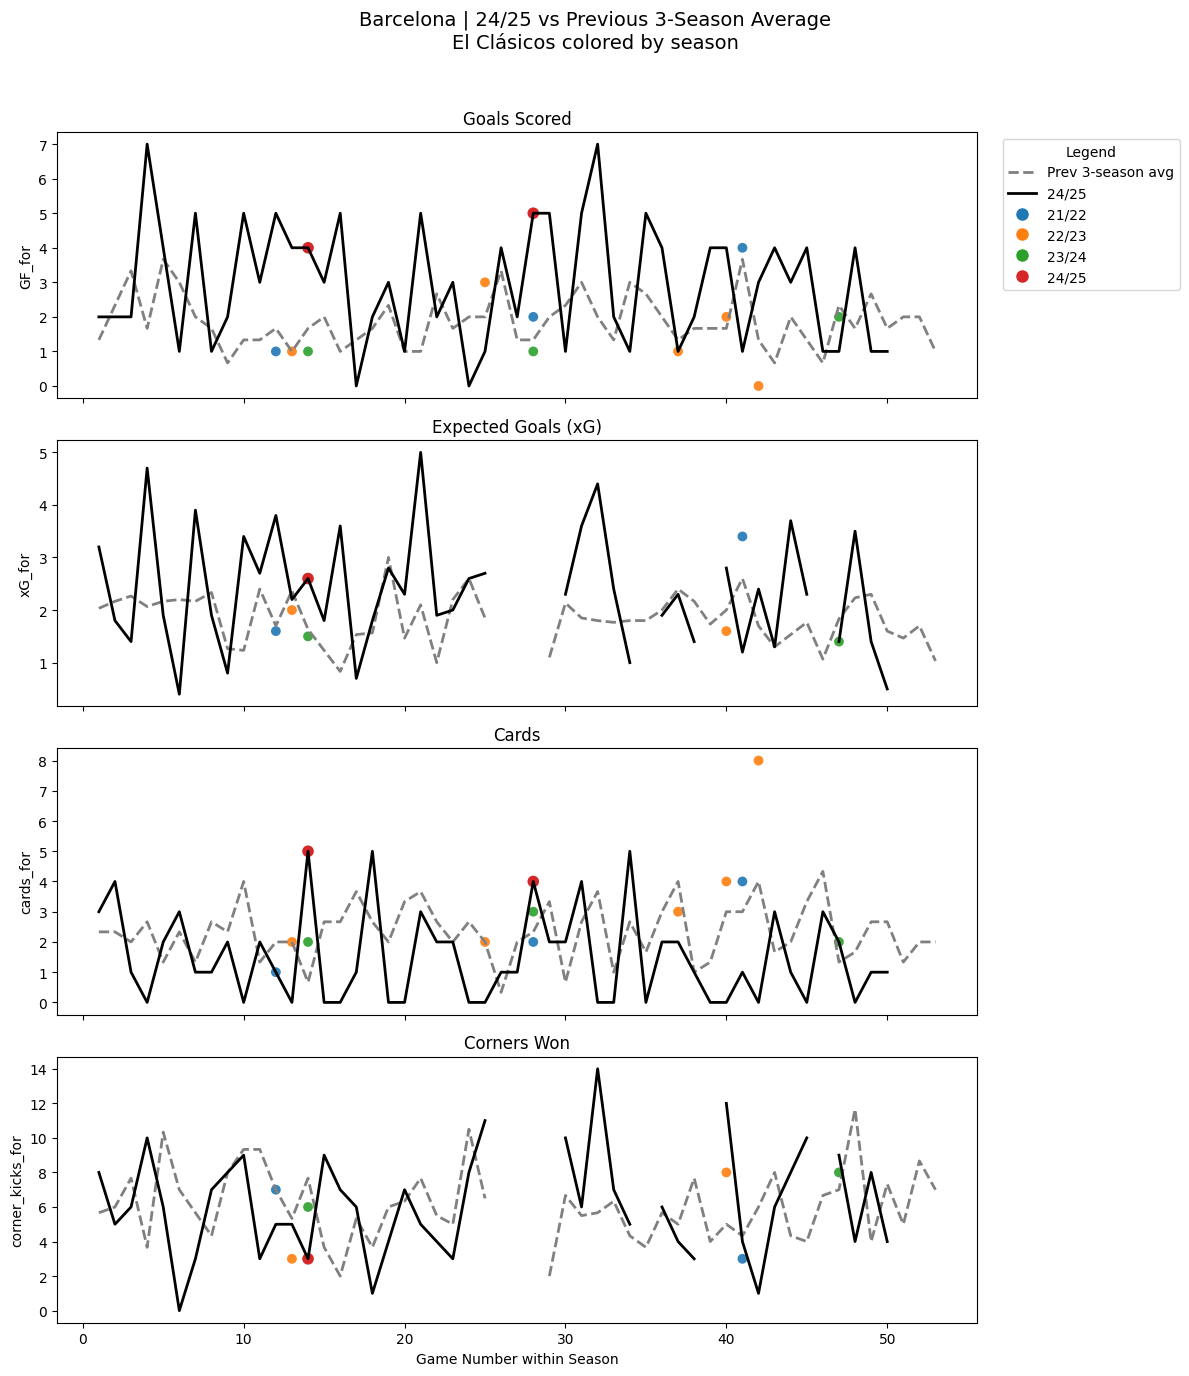

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Prep ---
df = df.sort_values(['Season','Date']).copy()
df['GameNo'] = df.groupby('Season').cumcount() + 1

# Cards (yellows + reds)
df['cards_for'] = pd.to_numeric(df.get('yellow_cards_for', 0), errors='coerce').fillna(0)

# Ensure numeric for other key cols
for col in ['GF_for','xG_for','GA_for','corner_kicks_for']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Over 2.5 flag (% for plotting)
df['TotalGoals'] = df['GF_for'] + df['GA_for']
df['Over25'] = (df['TotalGoals'] > 2.5).astype(float)
df['over25_pct'] = df['Over25'] * 100.0  # as percent

metrics = {
    'GF_for'          : 'Goals Scored',
    'xG_for'          : 'Expected Goals (xG)',
    'cards_for'       : 'Cards',

    'corner_kicks_for': 'Corners Won'
}

def season_start_year(s):  # "23/24" -> 2023
    return 2000 + int(s.split('/')[0])

seasons_sorted = sorted(df['Season'].dropna().unique(), key=season_start_year)
current_season = seasons_sorted[-1]
prev3_seasons  = seasons_sorted[-4:-1]  # up to 3 previous

df_curr = df[df['Season'].eq(current_season)]
df_prev = df[df['Season'].isin(prev3_seasons)]

# Prev-3 average by game number
prev_avg = df_prev.groupby('GameNo')[[*metrics.keys()]].mean().reset_index()

# Color map per season for El Clásico points
all_point_seasons = prev3_seasons + [current_season]
palette = plt.get_cmap('tab10')
season_color = {s: palette(i % 10) for i, s in enumerate(all_point_seasons)}

# --- Plot ---
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 14), sharex=True)

for ax, (col, title) in zip(axes, metrics.items()):
    # Prev-3 average line
    if not prev_avg.empty:
        ax.plot(prev_avg['GameNo'], prev_avg[col],
                linestyle='--', linewidth=2, color='gray', label='Prev 3-season avg')

    # Current season line
    if not df_curr.empty:
        ax.plot(df_curr['GameNo'], df_curr[col],
                linewidth=2, color='black', label=current_season)

    # El Clásico points by season (previous 3)
    for s in prev3_seasons:
        sub = df_prev[(df_prev['Season'].eq(s)) & (df_prev['Opponent'].eq('Real Madrid'))]
        if not sub.empty:
            ax.scatter(sub['GameNo'], sub[col], s=50,
                       color=season_color[s], edgecolor='none', alpha=0.9)

    # El Clásico points (current season)
    subc = df_curr[df_curr['Opponent'].eq('Real Madrid')]
    if not subc.empty:
        ax.scatter(subc['GameNo'], subc[col], s=70,
                   color=season_color[current_season], edgecolor='none', alpha=1.0)

    ax.set_title(title)
    ax.set_ylabel('%' if col == 'over25_pct' else col)

axes[-1].set_xlabel("Game Number within Season")

# Legend: lines + seasons
line_handles = [
    Line2D([0],[0], color='gray', linestyle='--', linewidth=2, label='Prev 3-season avg'),
    Line2D([0],[0], color='black', linewidth=2, label=current_season),
]
point_handles = [Line2D([0],[0], marker='o', linestyle='None',
                        color=season_color[s], label=s, markersize=8)
                 for s in all_point_seasons]

axes[0].legend(handles=line_handles + point_handles,
               loc='upper left', bbox_to_anchor=(1.02, 1.0), title='Legend')

plt.suptitle(f"Barcelona | {current_season} vs Previous 3-Season Average\nEl Clásicos colored by season", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()
